In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
models = ['gpt3.5', 'gpt4', 'gemini', 'llama7', 'llama70']
methods = ['io', 'cot', 'refine', 'decomp', 'ours', 'optimal']
sizes = [5,8,12,15,20,25,30]
tasks = ['assign', 'knapsack', 'bin-pack', 'tsp', 'vrp', 'jsp']
tasks_full = ['Assignment', 'Knapsack', 'Bin Packing', 'Travelling Salesman', 'Vehicle Routing', 'Job Scheduling']

results = pd.read_csv('results/results.csv')

In [3]:
# Table Main
i = 0
for task in tasks:
    row = tasks_full[i]
    i += 1
    for model in ('gpt4', 'gemini'):
        base_results = results.loc[results["Task"] == task]
        base_results = base_results.loc[base_results["Model"] == model]
        
        io_results = base_results.loc[base_results["Method"] == 'io'].sort_values('Size')['Cost'].values

        for method in ('cot', 'refine', 'decomp', 'ours'):
            subresults = base_results.loc[base_results["Method"] == method].sort_values('Size')['Cost'].values
            imrovement = abs(io_results - subresults) / io_results
            imrovement = 100*imrovement.mean()
            imrovement = round(imrovement, 2)
            if imrovement >= 100:
                imrovement = round(imrovement, 1)

            str_imrovement = str(imrovement)
            while len(str_imrovement) < 5:
                str_imrovement += '0'
            if method == 'ours':
                row += ' & \\textbf{' + str(str_imrovement) + '}'
            else:
                row += ' & ' + str(str_imrovement)
    row += " \\\ "
    print(row)


Assignment & 11.46 & 14.47 & 33.80 & \textbf{41.33} & 11.66 & 13.98 & 31.94 & \textbf{40.46} \\ 
Knapsack & 15.37 & 17.16 & 51.95 & \textbf{70.39} & 13.85 & 16.85 & 48.62 & \textbf{65.87} \\ 
Bin Packing & 14.06 & 17.12 & 39.57 & \textbf{74.72} & 11.89 & 15.43 & 35.74 & \textbf{67.63} \\ 
Travelling Salesman & 13.64 & 15.75 & 38.49 & \textbf{72.10} & 14.34 & 15.90 & 36.36 & \textbf{68.09} \\ 
Vehicle Routing & 14.27 & 16.94 & 36.73 & \textbf{71.92} & 11.88 & 15.13 & 33.59 & \textbf{68.02} \\ 
Job Scheduling & 13.84 & 16.37 & 38.20 & \textbf{75.33} & 13.41 & 15.75 & 36.36 & \textbf{67.89} \\ 


In [4]:
# Table Sizes
for size in sizes:
    row = str(size)
    for task in tasks:
        base_results = results.loc[results["Size"] == size]
        base_results = base_results.loc[base_results["Task"] == task]
        base_results = base_results.loc[base_results["Model"] == 'gpt4']
        
        io_results = base_results.loc[base_results["Method"] == 'io']
        io_results_mean = io_results['Cost'].values
        
        subresults = base_results.loc[base_results["Method"] == 'ours']
        subresults_mean = subresults['Cost'].values
        
        imrovement = abs(io_results_mean - subresults_mean)/io_results_mean
        imrovement = round(100*imrovement.mean(), 2)
        if imrovement >= 100:
            imrovement = round(imrovement, 1)

        str_imrovement = str(imrovement)
        while len(str_imrovement) < 5:
            str_imrovement += '0'
        row += ' & ' + str(str_imrovement)
    row += " \\\ "
    print(row)


5 & 44.05 & 75.94 & 90.92 & 76.77 & 80.47 & 87.81 \\ 
8 & 42.03 & 77.14 & 75.92 & 80.12 & 80.78 & 71.68 \\ 
12 & 42.65 & 72.50 & 80.36 & 79.93 & 76.18 & 77.08 \\ 
15 & 41.78 & 71.70 & 71.61 & 73.24 & 78.41 & 79.73 \\ 
20 & 40.24 & 67.21 & 69.78 & 67.14 & 65.19 & 76.29 \\ 
25 & 39.83 & 67.07 & 66.35 & 60.17 & 60.87 & 69.52 \\ 
30 & 38.75 & 61.15 & 68.13 & 67.32 & 61.55 & 65.20 \\ 


In [5]:
# Table Models
i = 0
for task in tasks:
    row = tasks_full[i]
    i += 1
    for model in models:         
        base_results = results.loc[results["Task"] == task]
        base_results = base_results.loc[base_results["Model"] == model]

        io_results = base_results.loc[base_results["Method"] == 'io']
        io_results_mean = io_results['Cost'].values

        subresults = base_results.loc[base_results["Method"] == 'ours']
        subresults_mean = subresults['Cost'].values

        imrovement = 100*abs(io_results_mean - subresults_mean)/io_results_mean
        imrovement = round(imrovement.mean(), 2)
        if imrovement >= 100:
            imrovement = round(imrovement, 1)
            
        str_imrovement = str(imrovement)
        while len(str_imrovement) < 5:
            str_imrovement += '0'
        row += ' & ' + str(str_imrovement)
    row += " \\\ "
    print(row)


Assignment & 25.35 & 41.33 & 40.46 & 23.19 & 24.01 \\ 
Knapsack & 34.43 & 70.39 & 65.87 & 28.37 & 32.82 \\ 
Bin Packing & 35.83 & 74.72 & 67.63 & 29.78 & 33.76 \\ 
Travelling Salesman & 35.26 & 72.10 & 68.09 & 30.65 & 33.77 \\ 
Vehicle Routing & 36.28 & 71.92 & 68.02 & 30.55 & 33.65 \\ 
Job Scheduling & 35.02 & 75.33 & 67.89 & 30.39 & 34.42 \\ 


In [6]:
# Table Efficiency

for model in ['gpt4']:
    base_results = results.loc[results["Model"] == model]
    io_results = base_results.loc[base_results["Method"] == 'io']['Cost'].values

    for method in ('cot', 'refine', 'decomp', 'ours'):
        subresults = base_results.loc[base_results["Method"] == method]['Cost'].values
        
        imrovement = abs(io_results - subresults) / io_results
        imrovement = 100*imrovement.mean()
        imrovement = round(imrovement, 2)
        if imrovement >= 100:
            imrovement = round(imrovement, 1)
        print(method, imrovement)

cot 13.77
refine 16.3
decomp 39.79
ours 67.63


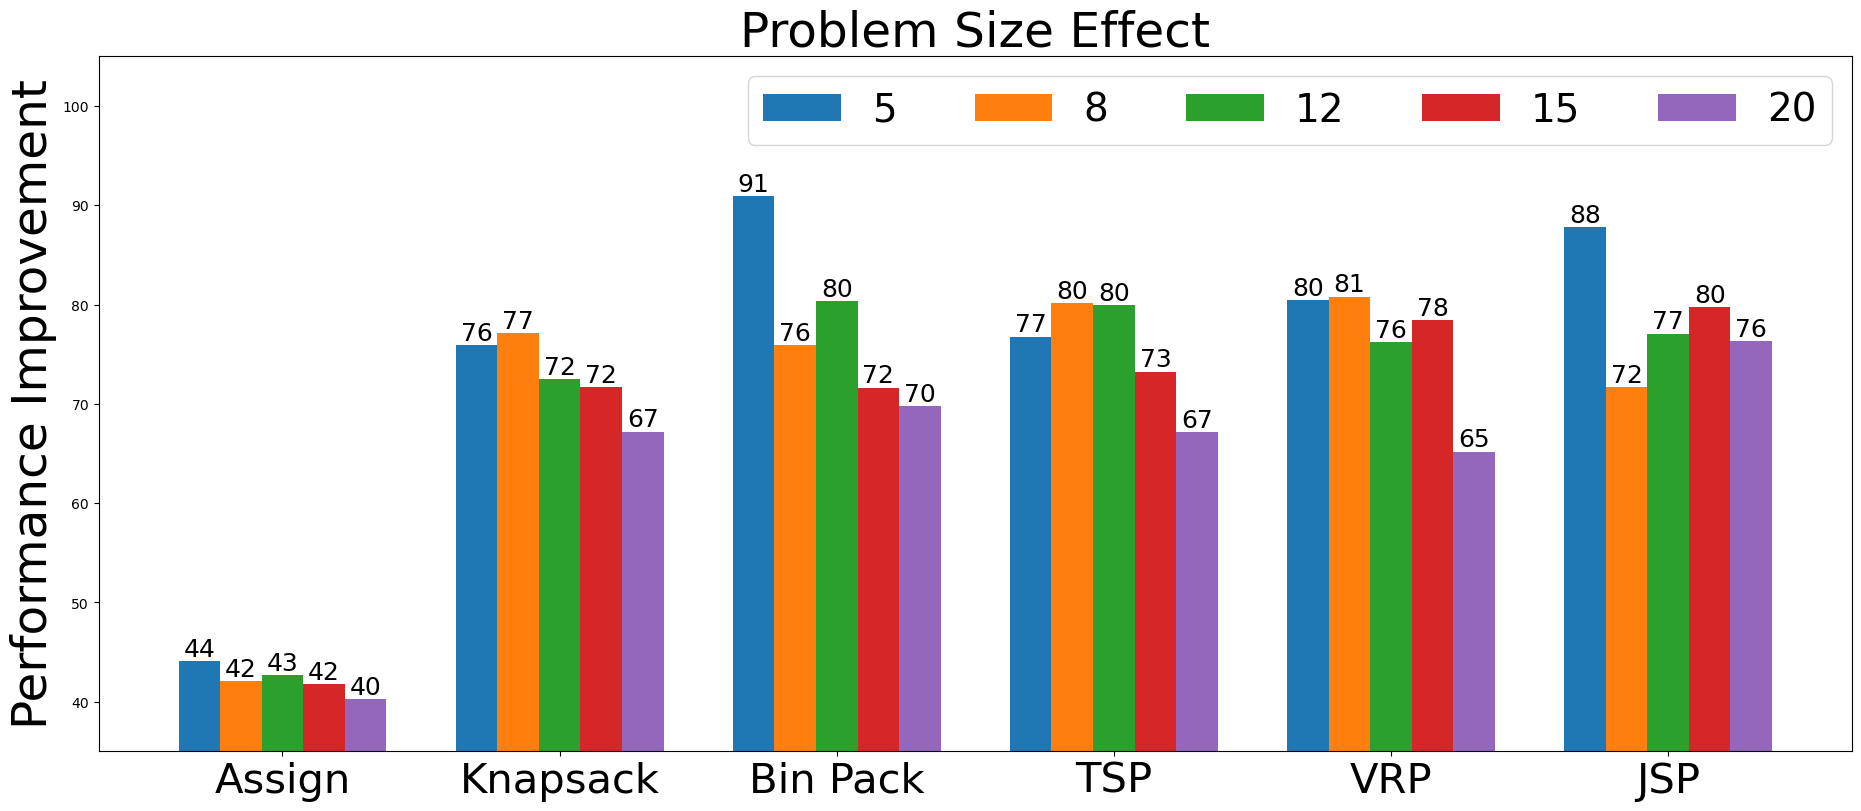

In [7]:
# Figure Sizes
data = {}
for size in sizes:
    if size == 25:
        break
    data[size] = []
    for task in tasks:
        base_results = results.loc[results["Size"] == size]
        base_results = base_results.loc[base_results["Task"] == task]
        base_results = base_results.loc[base_results["Model"] == 'gpt4']
        
        io_results = base_results.loc[base_results["Method"] == 'io']
        io_results_mean = io_results['Cost'].values
        
        subresults = base_results.loc[base_results["Method"] == 'ours']
        subresults_mean = subresults['Cost'].values
        
        imrovement = abs(io_results_mean - subresults_mean)/io_results_mean
        imrovement = round(100*imrovement.mean(), 2)
        if imrovement >= 100:
            imrovement = round(imrovement, 1)
        data[size].append(imrovement)

x = np.arange(len(tasks)) 
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
fig.set_size_inches(18.5, 8)
for size, improvement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, improvement, width, label=size)
    ax.bar_label(rects, fmt='%.0f', fontsize=18)
    multiplier += 1
tasks_full = ["Assign", "Knapsack", "Bin Pack", "TSP", "VRP", "JSP"]
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance Improvement',fontsize = 35)
ax.set_title('Problem Size Effect',fontsize = 35)
ax.set_xticks(x + 2*width, tasks_full,fontsize = 30)
ax.legend(loc='upper right', ncol=7, fontsize = 28)
ax.set_ylim(35, 105)

plt.show()

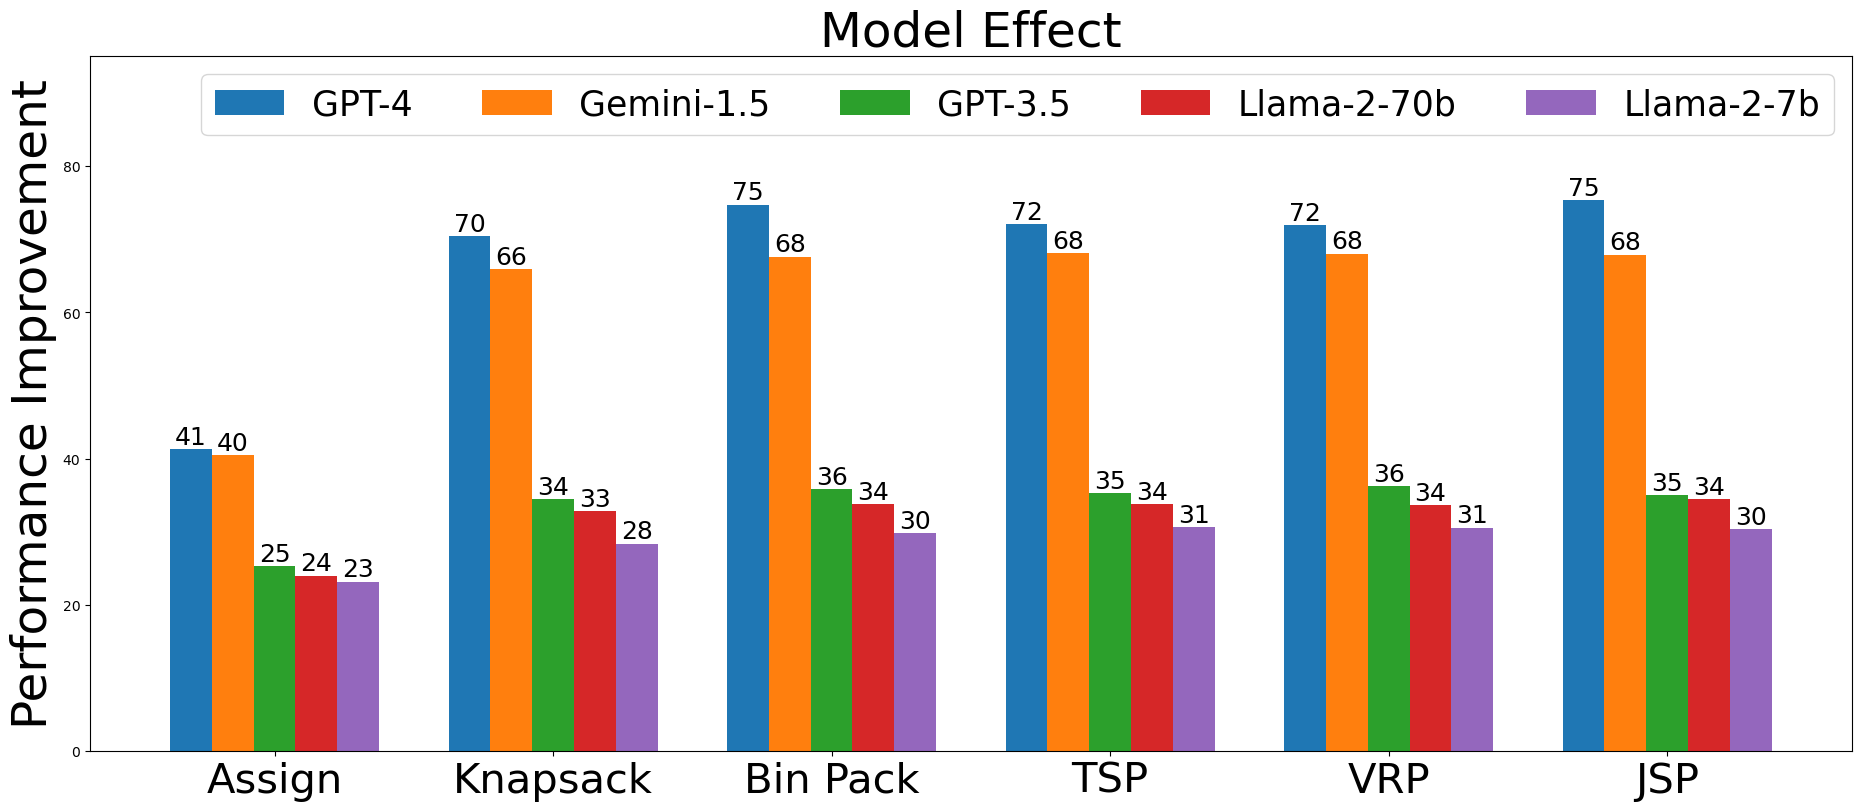

In [8]:
# Figure Models
data = {}
for model in ['gpt4', 'gemini', 'gpt3.5', 'llama70', 'llama7']: 
    data[model] = []
    for task in tasks:
        base_results = results.loc[results["Task"] == task]
        base_results = base_results.loc[base_results["Model"] == model]

        io_results = base_results.loc[base_results["Method"] == 'io']
        io_results_mean = io_results['Cost'].values

        subresults = base_results.loc[base_results["Method"] == 'ours']
        subresults_mean = subresults['Cost'].values

        imrovement = 100*abs(io_results_mean - subresults_mean)/io_results_mean
        imrovement = round(imrovement.mean(), 2)
        if imrovement >= 100:
            imrovement = round(imrovement, 1)
        data[model].append(imrovement)

x = np.arange(len(tasks)) 
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
fig.set_size_inches(18.5, 8)
model_name = {
    'gpt4' : 'GPT-4',
    'gemini' : 'Gemini-1.5',
    'gpt3.5' : 'GPT-3.5',
    'llama7' : 'Llama-2-7b',
    'llama70' : 'Llama-2-70b'
}

for model, improvement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, improvement, width, label=model_name[model])
    ax.bar_label(rects, fmt='%.0f', fontsize=18)
    multiplier += 1
tasks_full = ["Assign", "Knapsack", "Bin Pack", "TSP", "VRP", "JSP"]
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance Improvement',fontsize = 35)
ax.set_title('Model Effect',fontsize = 35)
ax.set_xticks(x + 2*width, tasks_full,fontsize = 30)
ax.legend(loc='upper right', ncol=7, fontsize = 25)
ax.set_ylim(0, 95)

plt.show()